In [63]:
import networkx as nx
import pandas as pd
from networkx.algorithms.community import k_clique_communities
from matplotlib import cm
import numpy as np

import matplotlib.pyplot as plt

gccatrr = pd.read_csv('largest_connected_component_with_attributes.csv', low_memory=False)
gccgraph = nx.from_pandas_edgelist(gccatrr, source='source', target='target', edge_attr=True)
print(gccgraph)


Graph with 26706 nodes and 41206 edges


NameError: name 'cm' is not defined

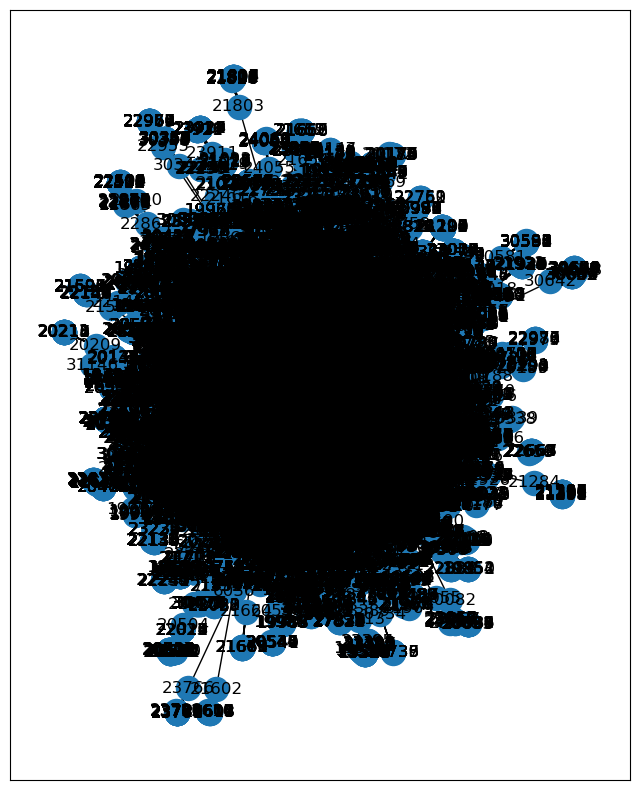

In [82]:
k_clique = k_clique_communities(gccgraph, 4)
clique_dict = dict(enumerate(k_clique))

def sort_xy(x, y):

    x0 = np.mean(x)
    y0 = np.mean(y)

    r = np.sqrt((x-x0)**2 + (y-y0)**2)

    angles = np.where((y-y0) > 0, np.arccos((x-x0)/r), 2*np.pi-np.arccos((x-x0)/r))

    mask = np.argsort(angles)

    x_sorted = x[mask]
    y_sorted = y[mask]

    return x_sorted, y_sorted

G = gccgraph

pos = nx.spring_layout(G, seed=42)
fig, ax = plt.subplots(figsize=(8, 10))
nx.draw_networkx(G, pos=pos, with_labels=True)

communities = nx.community.louvain_communities(G)

alpha = 0.5
edge_padding = 10
colors = cm.get_cmap('viridis', len(communities))

for i, comm in enumerate(communities):

    if len(comm) == 1:
        cir = plt.Circle((pos[comm.pop()]), edge_padding / 100, alpha=alpha, color=colors(i))
        ax.add_patch(cir)

    elif len(comm) == 2:
        comm_pos = {k: pos[k] for k in comm}
        coords = [a for a in zip(*comm_pos.values())]
        x, y = coords[0], coords[1]
        plt.plot(x, y, linewidth=edge_padding, linestyle="-",  alpha=alpha, color=colors(i))

    else:
        comm_pos = {k: pos[k] for k in comm}
        coords = [a for a in zip(*comm_pos.values())]
        x, y = sort_xy(np.array(coords[0]), np.array(coords[1]))
        plt.fill(x, y, alpha=alpha, facecolor=colors(i),
                 edgecolor=colors(i), # set to None to remove edge padding
                 linewidth=edge_padding)

C:\Users\edbma\AppData\Local\Temp\ipykernel_39084\3921695288.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx(gccgraph, pos, node_color=colors, with_labels=True, cmap=plt.cm.get_cmap("viridis"), node_size=10)


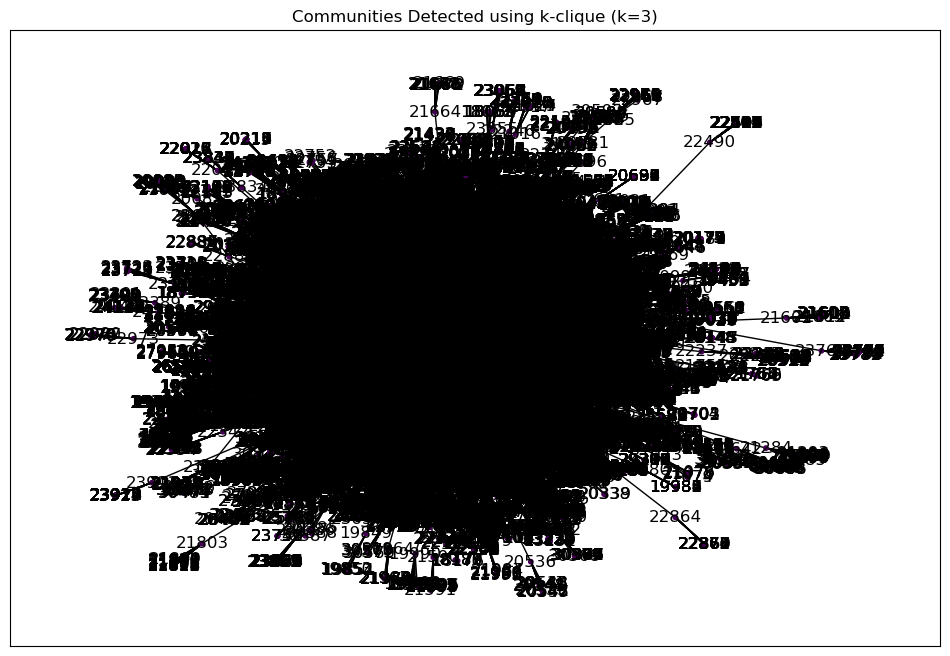

In [57]:
#perform k clique community detection
# Assuming you already have the Gcc graph
# If not, make sure to create it from your graph using the largest connected component

# Perform k-clique community detection
k = 3
k_clique_communities_result = list(k_clique_communities(gccgraph, k))

# Create a dictionary mapping each node to its community index
node_community_mapping = {node: i for i, clique in enumerate(k_clique_communities_result) for node in clique}

# Get a list of colors for each node based on its community
colors = [node_community_mapping.get(node, 0) for node in gccgraph.nodes()]  # Use .get() to handle missing keys

plt.figure(figsize=(12, 8))

# Reduce node size and use show(block=False)
pos = nx.spring_layout(gccgraph)  # You can choose a different layout if needed

# Visualize the communities
nx.draw_networkx(gccgraph, pos, node_color=colors, with_labels=True, cmap=plt.cm.get_cmap("viridis"), node_size=10)

plt.title(f'Communities Detected using k-clique (k={k})')
plt.show()



k	P_c(k)	# of Communities	Average Size of Communities	Critical Point
2	0.0000			1				26706.00					0.0000
3	0.0097			258				6.86					0.0031
4	0.0024			64				6.06					0.0112
5	0.0005			13				6.92					0.0196
6	0.0001			2				7.00					0.0260
7	0.0000			1				7.00					0.0305
8	0.0000			0				0.00					0.0333
9	0.0000			0				0.00					0.0350


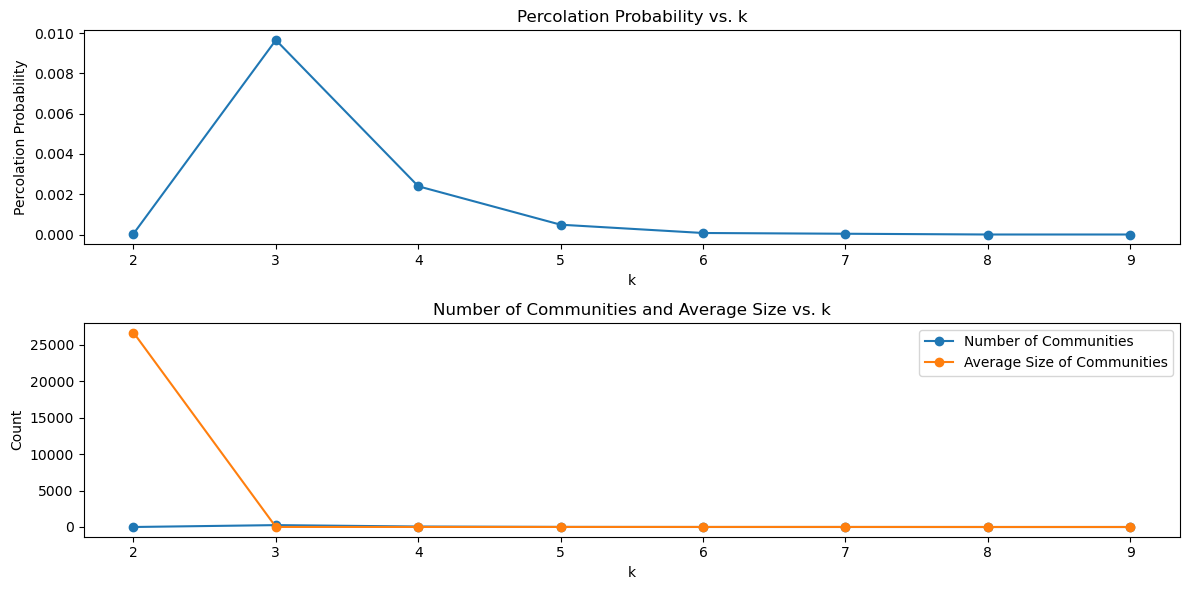

In [66]:
import networkx as nx
import pandas as pd
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt

def find_critical_point(graph, k):
    N = graph.number_of_nodes()
    return 1 / ((k - 1) * N ** (1 / (k - 1)))

# Parameters
k_values = range(2, 10)
percolation_probabilities = []
num_communities_list = []
avg_size_list = []
critical_points = []

# Calculate percolation probability, number of communities, and average size for each k
for k_value in k_values:
    communities = list(k_clique_communities(gccgraph, k_value))

    # Check if the number of nodes is not zero
    if gccgraph.number_of_nodes() != 0:
        # Calculate percolation probability
        pc = len(communities) / gccgraph.number_of_nodes()
        percolation_probabilities.append(pc)
    else:
        percolation_probabilities.append(0)  # Set percolation probability to 0 if the number of nodes is zero

    # Number of communities
    num_communities = len(communities)
    num_communities_list.append(num_communities)

    # Average size of communities
    avg_size = sum(len(community) for community in communities) / num_communities if num_communities != 0 else 0
    avg_size_list.append(avg_size)

    # Critical point
    critical_points.append(find_critical_point(gccgraph, k_value))


# Print or plot the results
print("k\tP_c(k)\t# of Communities\tAverage Size of Communities\tCritical Point")
for k_value, pc, num_communities, avg_size, critical_point in zip(k_values, percolation_probabilities, num_communities_list, avg_size_list,critical_points):
    print(f"{k_value}\t{pc:.4f}\t\t\t{num_communities}\t\t\t\t{avg_size:.2f}\t\t\t\t\t{critical_point:.4f}")

# Plot the results if needed
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(k_values, percolation_probabilities, marker='o')
plt.xlabel('k')
plt.ylabel('Percolation Probability')
plt.title('Percolation Probability vs. k')

plt.subplot(2, 1, 2)
plt.plot(k_values, num_communities_list, marker='o', label='Number of Communities')
plt.plot(k_values, avg_size_list, marker='o', label='Average Size of Communities')
plt.xlabel('k')
plt.ylabel('Count')
plt.title('Number of Communities and Average Size vs. k')
plt.legend()

plt.tight_layout()
plt.show()






##best k value found through critical percolation probability


In [54]:
print(gccgraph)
k_clique_communities_result = list(k_clique_communities(gccgraph, 7))
print(k_clique_communities_result)
#pos = nx.spring_layout(gccgraph)
#nx.draw(gccgraph,pos,with_labels=True, node_size = 50)
#plt.show()

Graph with 26706 nodes and 41206 edges
[frozenset({4052, 4053, 3384, 153, 154, 251, 3389})]


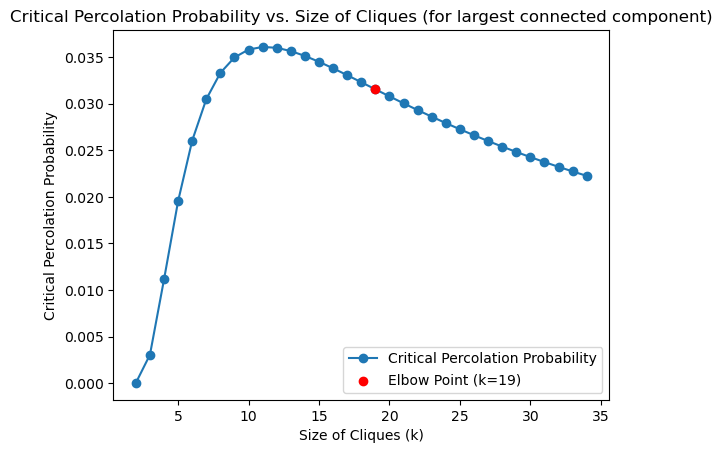

Detected Elbow Point: k = 19


In [61]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

def find_critical_point(graph, k):
    N = graph.number_of_nodes()
    return 1 / ((k - 1) * N ** (1 / (k - 1)))

k_values = list(range(2, 35))
p_critical_values = []

for k in k_values:
    p_critical = find_critical_point(gccgraph, k)
    p_critical_values.append(p_critical)

# Calculate the first derivative to find the slope
derivative = np.diff(p_critical_values)

# Find peaks (negative values) in the derivative
peaks, _ = find_peaks(-derivative)

if len(peaks) > 0:
    # Choose the first peak as the elbow point
    elbow_index = peaks[0] + 1  # Add 1 to get the index in the original array

    # Plot the results
    plt.plot(k_values, p_critical_values, marker='o', label='Critical Percolation Probability')

    # Mark the elbow point on the plot
    plt.scatter(k_values[elbow_index], p_critical_values[elbow_index], c='red', label=f'Elbow Point (k={k_values[elbow_index]})', zorder=10)

    plt.xlabel('Size of Cliques (k)')
    plt.ylabel('Critical Percolation Probability')
    plt.title('Critical Percolation Probability vs. Size of Cliques (for largest connected component)')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    # Print the detected elbow point
    print(f'Detected Elbow Point: k = {k_values[elbow_index]}')
else:
    print('No peaks found. Consider adjusting the range of k_values or the graph structure.')
